In [2]:
import pandas as pd
import copy
import requests
from tqdm.notebook import tqdm
from tqdm import tqdm
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By          # - 정보 획득
from selenium.webdriver.common.keys import Keys
# from engine_connect import create_engine_connect, db_connection
from sqlalchemy import create_engine
import os
import re
import time
from bs4 import BeautifulSoup
import warnings
import pymysql
import math
warnings.filterwarnings(action='ignore')
from selenium.webdriver.common.action_chains import ActionChains
import json


import time
import datetime as dt # 사용시 datetime.dt 로 사용 # 현재 시간 사용
from datetime import datetime # 사용시 함수로 바로 사용 #-> 시간 비교

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
plt.rcParams.update({'font.family': 'NanumBarunGothic'})

import scipy
import scipy.stats as stats
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [4]:
### 한글 폰트 설치
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

path = 'c:/Windows/Fonts/malgun.ttf'  # 또는 나눔고딕: 'c:/Windows/Fonts/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [5]:
directory = os.getcwd()
print("Current working directory : ", directory)

#수집날짜
folder_date = str(dt.datetime.now().date())
folder_date = re.sub("-", ".", folder_date)
today = re.sub("\.", "", folder_date)
print('오늘 날짜 : ', folder_date)

now = dt.datetime.now()
print('현재 시간 : ', now)


Current working directory :  C:\Develops\Competetion_Gangneung_vision_planning
오늘 날짜 :  2024.08.06
현재 시간 :  2024-08-06 21:04:35.114962


### 한국도로공사_로드킬 데이터 확인

In [6]:
df_roadkill_info = pd.read_csv(f"{directory}/data/한국도로공사_로드킬 데이터 정보_20231231.csv", encoding='euc-kr')
df_roadkill_info

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도
0,서울경기,화성,서해안선,310~315,목포,310,3,37.217471,126.871994
1,서울경기,화성,서해안선,310~315,서울,310,3,37.217471,126.871994
2,서울경기,시흥,수도권제1순환선,100~105,판교,100,4,37.419086,126.828963
3,서울경기,경기광주,중부선,325~330,통영,325,6,37.248957,127.421370
4,서울경기,경기광주,중부선,325~330,하남,325,3,37.248957,127.421370
...,...,...,...,...,...,...,...,...,...
82,광주전남,함평,서해안선,35~40,서울,35,3,35.109966,126.481287
83,광주전남,함평,서해안선,55~60,서울,55,3,35.273296,126.543684
84,대구경북,고령,광주대구선,165~170,광주,165,5,35.753698,128.359582
85,부산경남,창원,남해1지선,0~5,함안,0,3,35.271400,128.474403


In [7]:
df_roadkill_info["본부명"].unique()

array(['서울경기', '강원', '충북', '대전충남', '전북', '광주전남', '대구경북', '부산경남'],
      dtype=object)

In [10]:
df_roadkill_region = df_roadkill_info.groupby('본부명')['발생건수'].sum().reset_index()
df_roadkill_region

,본부명,발생건수
0,강원,44
1,광주전남,38
2,대구경북,5
3,대전충남,66
4,부산경남,7
5,서울경기,25
6,전북,49
7,충북,79


In [11]:
df_roadkill_region_sorted = df_roadkill_region.sort_values(by='발생건수', ascending=False)
df_roadkill_region_sorted

,본부명,발생건수
7,충북,79
3,대전충남,66
6,전북,49
0,강원,44
1,광주전남,38
5,서울경기,25
4,부산경남,7
2,대구경북,5


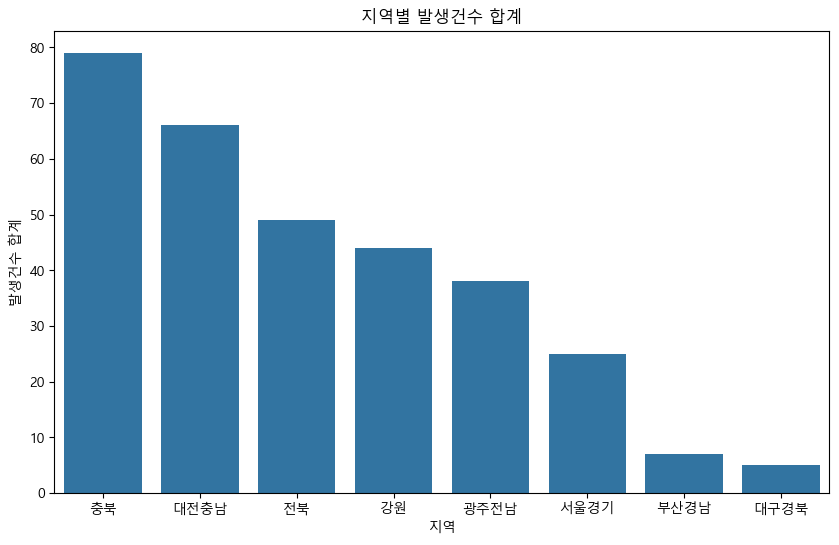

In [12]:
# Seaborn을 이용한 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=df_roadkill_region_sorted, x='본부명', y='발생건수')
plt.title('지역별 발생건수 합계')
plt.xlabel('지역')
plt.ylabel('발생건수 합계')

# 그래프 보여주기
plt.show()